In [1]:
import pandas as pan
import numpy as num
import matplotlib.pyplot as mat
import os

In [2]:
# Get the current working directory
wd = os.getcwd()

In [3]:
wd

'C:\\Users\\Mok\\Files\\NUS\\Python\\PythonForAnalytics\\Data\\EducationGDP1'

### This case study tries to explode the relationship between government expenditure on education and the GDP of a country. We will be using the following two sets of data:
#### https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp
#### https://ourworldindata.org/grapher/gdp-per-capita-worldbank

In [4]:
# scenario 1 - using the mean expenditure and mean GDP of selected countries

In [5]:
# https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp
# Get the expenditure data
df1 = pan.read_csv("total-government-expenditure-on-education-gdp.csv")

In [6]:
df1.head()

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,AFG,1971,1.16036
1,Afghanistan,AFG,1972,1.11718
2,Afghanistan,AFG,1973,1.42788
3,Afghanistan,AFG,1975,1.30332
4,Afghanistan,AFG,1979,1.73981


In [7]:
df1.shape

(4849, 4)

In [8]:
df1.dtypes

Entity                                                    object
Code                                                      object
Year                                                       int64
Government expenditure on education, total (% of GDP)    float64
dtype: object

In [9]:
df1.nunique()

Entity                                                    243
Code                                                      197
Year                                                       50
Government expenditure on education, total (% of GDP)    4238
dtype: int64

In [10]:
entity1 = df1["Entity"].value_counts()
entity1

Switzerland          46
Austria              46
Netherlands          45
Norway               45
Ireland              45
                     ..
Libya                 1
Equatorial Guinea     1
Nauru                 1
Turkmenistan          1
Curacao               1
Name: Entity, Length: 243, dtype: int64

In [11]:
expenditure1 = df1.groupby(["Entity"])[["Government expenditure on education, total (% of GDP)"]].agg(num.mean)
expenditure1

,"Government expenditure on education, total (% of GDP)"
Entity,
Afghanistan,2.529187
Africa Eastern and Southern,4.395773
Africa Western and Central,2.993186
Albania,3.418164
Algeria,6.038817
...,...
Vietnam,4.918966
World,4.263374
Yemen,8.011537


In [12]:
expenditure1 = expenditure1.sort_values(by="Entity",ascending=True).reset_index()
expenditure1

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,2.529187
1,Africa Eastern and Southern,4.395773
2,Africa Western and Central,2.993186
3,Albania,3.418164
4,Algeria,6.038817
...,...,...
238,Vietnam,4.918966
239,World,4.263374
240,Yemen,8.011537
241,Zambia,3.729464


In [13]:
# save as csv file
expenditure1.to_csv("rankbyexpenditure.csv", index=False)

In [14]:
# https://ourworldindata.org/grapher/gdp-per-capita-worldbank
# Get the GDP data
df2 = pan.read_csv("gdp-per-capita-worldbank.csv")

In [15]:
df2.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [16]:
df2.shape

(7109, 4)

In [17]:
df2.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
GDP per capita, PPP (constant 2017 international $)    float64
dtype: object

In [18]:
df2.nunique()

Entity                                                  240
Code                                                    195
Year                                                     31
GDP per capita, PPP (constant 2017 international $)    7050
dtype: int64

In [19]:
entity2 = df2["Entity"].value_counts()
entity2

Zimbabwe                      31
Middle East & North Africa    31
Luxembourg                    31
Macao                         31
Madagascar                    31
                              ..
Cayman Islands                14
Turks and Caicos Islands      10
Sint Maarten (Dutch part)     10
Somalia                        9
Djibouti                       8
Name: Entity, Length: 240, dtype: int64

In [20]:
GDP1 = df2.groupby(["Entity"])[["GDP per capita, PPP (constant 2017 international $)"]].agg(num.mean)
GDP1

,"GDP per capita, PPP (constant 2017 international $)"
Entity,
Afghanistan,1755.250894
Africa Eastern and Southern,3025.271927
Africa Western and Central,3324.486598
Albania,8264.789644
Algeria,9920.676960
...,...
Vanuatu,2952.607100
Vietnam,4279.099478
World,12682.336851


In [21]:
GDP1 = GDP1.sort_values(by="Entity",ascending=True).reset_index()
GDP1

,Entity,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,1755.250894
1,Africa Eastern and Southern,3025.271927
2,Africa Western and Central,3324.486598
3,Albania,8264.789644
4,Algeria,9920.676960
...,...,...
235,Vanuatu,2952.607100
236,Vietnam,4279.099478
237,World,12682.336851
238,Zambia,2613.989465


In [22]:
GDP1.to_csv("rankbyGDP.csv", index=False)

In [23]:
# Prepare the data for the selected countries
countrylist = ["Argentina","Australia","Brazil","Canada","China","Egypt","Germany","Hong Kong","Israel","New Zealand","Saudi Arabia","South Africa","United Kingdom","United States"]

In [24]:
countrylist = pan.DataFrame(countrylist,columns=["Name"])
countrylist

,Name
0,Argentina
1,Australia
2,Brazil
3,Canada
4,China
5,Egypt
6,Germany
7,Hong Kong
8,Israel
9,New Zealand


In [25]:
countrylist["GDP"] = 0.0
countrylist["Expenditure"] = 0.0

In [26]:
countrylist

,Name,GDP,Expenditure
0,Argentina,0.0,0.0
1,Australia,0.0,0.0
2,Brazil,0.0,0.0
3,Canada,0.0,0.0
4,China,0.0,0.0
5,Egypt,0.0,0.0
6,Germany,0.0,0.0
7,Hong Kong,0.0,0.0
8,Israel,0.0,0.0
9,New Zealand,0.0,0.0


In [27]:
lencountry = len(countrylist)
lencountry

14

In [28]:
count1=0
for ind1 in range(len(expenditure1)):
    if (count1 < lencountry):
        if (countrylist["Name"][count1] == expenditure1["Entity"][ind1]):
            countrylist["Expenditure"][count1] = expenditure1["Government expenditure on education, total (% of GDP)"][ind1]
            count1+=1

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
countrylist

,Name,GDP,Expenditure
0,Argentina,0.0,3.317577
1,Australia,0.0,5.151343
2,Brazil,0.0,5.080326
3,Canada,0.0,6.197651
4,China,0.0,1.908977
5,Egypt,0.0,4.600963
6,Germany,0.0,4.667312
7,Hong Kong,0.0,3.086896
8,Israel,0.0,6.065511
9,New Zealand,0.0,5.548614


In [30]:
count2=0
for ind1 in range(len(GDP1)):
    if (count2 < 14):
        if (countrylist["Name"][count2] == GDP1["Entity"][ind1]):
            countrylist["GDP"][count2] = GDP1["GDP per capita, PPP (constant 2017 international $)"][ind1]
            count2+=1

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
countrylist

,Name,GDP,Expenditure
0,Argentina,20125.560908,3.317577
1,Australia,40953.089133,5.151343
2,Brazil,12921.597170,5.080326
3,Canada,43169.484078,6.197651
4,China,7004.509295,1.908977
5,Egypt,8723.648822,4.600963
6,Germany,45109.291175,4.667312
7,Hong Kong,44467.746416,3.086896
8,Israel,33745.168387,6.065511
9,New Zealand,35550.895245,5.548614


In [32]:
# Explode the relationship

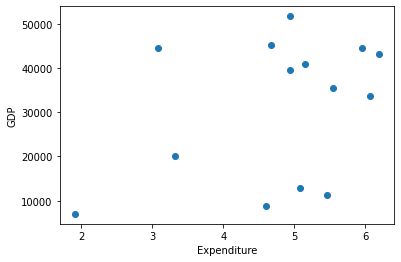

In [33]:
mat.scatter(countrylist["Expenditure"],countrylist["GDP"])
mat.xlabel("Expenditure")
mat.ylabel("GDP")
mat.show()

In [34]:
corr1 = countrylist[["Expenditure","GDP"]]
corr1.corr()

,Expenditure,GDP
Expenditure,1.000000,0.372994
GDP,0.372994,1.000000


### Conclusion for scenario 1
#### The correlation is positive, but it is not very strong.

In [35]:
# scenario 2 - using mean expenditure and maximum GDP values of selected countries

In [36]:
# Get the data on expenditure
expenditure2 = df1.groupby(["Entity"])[["Government expenditure on education, total (% of GDP)"]].agg(num.mean)
expenditure2

,"Government expenditure on education, total (% of GDP)"
Entity,
Afghanistan,2.529187
Africa Eastern and Southern,4.395773
Africa Western and Central,2.993186
Albania,3.418164
Algeria,6.038817
...,...
Vietnam,4.918966
World,4.263374
Yemen,8.011537


In [37]:
expenditure2 = expenditure2.sort_values(by="Entity",ascending=True).reset_index()
expenditure2

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,2.529187
1,Africa Eastern and Southern,4.395773
2,Africa Western and Central,2.993186
3,Albania,3.418164
4,Algeria,6.038817
...,...,...
238,Vietnam,4.918966
239,World,4.263374
240,Yemen,8.011537
241,Zambia,3.729464


In [38]:
# Get the data on GDP
GDP2 = df2.groupby(["Entity"])[["GDP per capita, PPP (constant 2017 international $)"]].agg(num.max)
GDP2

,"GDP per capita, PPP (constant 2017 international $)"
Entity,
Afghanistan,2116.465258
Africa Eastern and Southern,3579.271917
Africa Western and Central,4202.057923
Albania,13671.488422
Algeria,11826.166416
...,...
Vanuatu,3129.645024
Vietnam,8200.331867
World,16915.287846


In [39]:
GDP2 = GDP2.sort_values(by="Entity",ascending=True).reset_index()
GDP2

,Entity,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,2116.465258
1,Africa Eastern and Southern,3579.271917
2,Africa Western and Central,4202.057923
3,Albania,13671.488422
4,Algeria,11826.166416
...,...,...
235,Vanuatu,3129.645024
236,Vietnam,8200.331867
237,World,16915.287846
238,Zambia,3521.542063


In [40]:
# Prepare the data for selected countries
countrylist2 = ["Argentina", "Australia", "Brazil", "Canada", "China", "Egypt", "Germany", "Hong Kong", "Israel",
               "New Zealand", "Saudi Arabia", "South Africa", "United Kingdom", "United States"]
countrylist2 = pan.DataFrame(countrylist2, columns=["Name"])
countrylist2

,Name
0,Argentina
1,Australia
2,Brazil
3,Canada
4,China
5,Egypt
6,Germany
7,Hong Kong
8,Israel
9,New Zealand


In [41]:
countrylist2["GDP"] = 0.0
countrylist2["Expenditure"] = 0.0
listlen2 = len(countrylist2)
countrylist2

,Name,GDP,Expenditure
0,Argentina,0.0,0.0
1,Australia,0.0,0.0
2,Brazil,0.0,0.0
3,Canada,0.0,0.0
4,China,0.0,0.0
5,Egypt,0.0,0.0
6,Germany,0.0,0.0
7,Hong Kong,0.0,0.0
8,Israel,0.0,0.0
9,New Zealand,0.0,0.0


In [42]:
lencountry2 = len(countrylist2)
print(lencountry2)

14


In [43]:
count1b=0
for ind1 in range(len(expenditure2)):
    if (count1b < lencountry2):
        if (countrylist2["Name"][count1b] == expenditure2["Entity"][ind1]):
            countrylist2["Expenditure"][count1b] = expenditure2["Government expenditure on education, total (% of GDP)"][ind1]
            count1b+=1

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
countrylist2

,Name,GDP,Expenditure
0,Argentina,0.0,3.317577
1,Australia,0.0,5.151343
2,Brazil,0.0,5.080326
3,Canada,0.0,6.197651
4,China,0.0,1.908977
5,Egypt,0.0,4.600963
6,Germany,0.0,4.667312
7,Hong Kong,0.0,3.086896
8,Israel,0.0,6.065511
9,New Zealand,0.0,5.548614


In [45]:
count2b=0
for ind1 in range(len(GDP2)):
    if (count2b < 14):
        if (countrylist2["Name"][count2b] == GDP2["Entity"][ind1]):
            countrylist2["GDP"][count2b] = GDP2["GDP per capita, PPP (constant 2017 international $)"][ind1]
            count2b+=1

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [46]:
countrylist2

,Name,GDP,Expenditure
0,Argentina,24647.629274,3.317577
1,Australia,49455.538508,5.151343
2,Brazil,15805.222910,5.080326
3,Canada,49006.743107,6.197651
4,China,16410.797797,1.908977
5,Egypt,11951.447527,4.600963
6,Germany,53639.260722,4.667312
7,Hong Kong,61062.947653,3.086896
8,Israel,40007.319158,6.065511
9,New Zealand,42877.942911,5.548614


In [47]:
# Explode the relationship

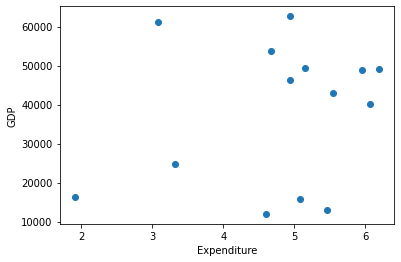

In [48]:
mat.scatter(countrylist2["Expenditure"],countrylist2["GDP"])
mat.xlabel("Expenditure")
mat.ylabel("GDP")
mat.show()

In [49]:
corr2 = countrylist2[["Expenditure", "GDP"]]
corr2.corr()

,Expenditure,GDP
Expenditure,1.000000,0.227428
GDP,0.227428,1.000000


### Conclusion for scenario 2
#### The correlation is positive, but it is not very strong.

In [50]:
# scenario 3 - using categorical expenditure and GDP mean values

In [51]:
# prepare the data on expenditure
con1a = df1["Entity"] == "High income"
con1b = df1["Entity"] == "Middle income"
con1c = df1["Entity"] == "Low & middle income"

In [52]:
ex1 = df1[con1a+con1b+con1c]

In [53]:
ex1

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
1774,High income,NaN,1974,4.482310
1775,High income,NaN,1975,4.851115
1776,High income,NaN,1976,4.728925
1777,High income,NaN,1978,4.713470
1778,High income,NaN,1979,4.637140
...,...,...,...,...
2992,Middle income,NaN,2013,4.074200
2993,Middle income,NaN,2014,4.491820
2994,Middle income,NaN,2015,4.490640
2995,Middle income,NaN,2016,4.026735


In [54]:
ex1 = ex1.groupby(["Entity"])[["Government expenditure on education, total (% of GDP)"]].agg(num.mean).reset_index()
ex1

,Entity,"Government expenditure on education, total (% of GDP)"
0,High income,4.901246
1,Low & middle income,3.736427
2,Middle income,3.967872


In [55]:
# prepare the data on GDP
con2a = df2["Entity"] == "High income"
con2b = df2["Entity"] == "Middle income"
con2c = df2["Entity"] == "Low & middle income"

In [56]:
gdp1 = df2[con2a+con2b+con2c]

In [57]:
gdp1

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
2668,High income,NaN,1990,32045.805755
2669,High income,NaN,1991,32339.294597
2670,High income,NaN,1992,32867.616182
2671,High income,NaN,1993,33027.614228
2672,High income,NaN,1994,33858.139811
...,...,...,...,...
4366,Middle income,NaN,2016,10472.943640
4367,Middle income,NaN,2017,10884.671933
4368,Middle income,NaN,2018,11274.610855
4369,Middle income,NaN,2019,11577.730986


In [58]:
gdp1 = gdp1.groupby(["Entity"])[["GDP per capita, PPP (constant 2017 international $)"]].agg(num.mean).reset_index()
gdp1

,Entity,"GDP per capita, PPP (constant 2017 international $)"
0,High income,41529.111668
1,Low & middle income,6710.450045
2,Middle income,7196.224520


In [59]:
# Explode the data

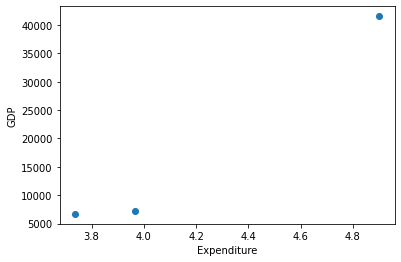

In [60]:
mat.scatter(ex1["Government expenditure on education, total (% of GDP)"],gdp1["GDP per capita, PPP (constant 2017 international $)"])
mat.xlabel("Expenditure")
mat.ylabel("GDP")
mat.show()

In [61]:
com1 = pan.DataFrame(ex1["Government expenditure on education, total (% of GDP)"])

In [62]:
com1

,"Government expenditure on education, total (% of GDP)"
0,4.901246
1,3.736427
2,3.967872


In [63]:
com1["GDP"] = gdp1["GDP per capita, PPP (constant 2017 international $)"]

In [64]:
com1

,"Government expenditure on education, total (% of GDP)",GDP
0,4.901246,41529.111668
1,3.736427,6710.450045
2,3.967872,7196.224520


In [65]:
com1.corr()

,"Government expenditure on education, total (% of GDP)",GDP
"Government expenditure on education, total (% of GDP)",1.000000,0.984444
GDP,0.984444,1.000000


### Conclusion for scenario 3
#### The correlation is positive and it is very strong. The strong positive correlation shows that countries with higher expenditure on education tend to have higher GDP as well.

### Summary
#### The results for scenarios 1 and 2 showed that the sample size is quite important in determining the accuracy of the data. With appropriate data size, the accuracy will improve for data with inherent positive relationship.